In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import sys
sys.path.append('../src')

import torch
from datautils.dataloader import build_data_loader
import utils


In [151]:
val_loader = build_data_loader(
    data_dir='../data/ShapeNet/ShapeNetV1processed',
    split_name='val',
    splits_file='../dataset/bench_splits.json',
    batch_size=1,
    num_workers=4,
    multigpu=False,
    shuffle=True,
    num_samples=None
)


In [176]:
batch = next(iter(val_loader))
images, meshes, ptcld, normals, RT, K = val_loader.postprocess(batch)


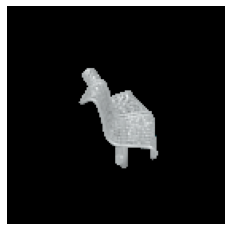

In [177]:
import matplotlib.pyplot as plt

transform = utils.imagenet_deprocess()
image = utils.format_image(transform(images[0]))
plt.axis('off')
plt.imshow(image)


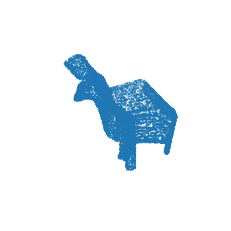

In [186]:
rot = torch.tensor(
    [[1,  0,  0,  0],
     [0,  0,  1,  0],
     [0,  1,  0,  0],
     [0,  0,  0,  1]],
    device='cuda'
).to(ptclds_gt).unsqueeze(0)
ptclds = utils.rotate_verts(K, ptcld).cpu()

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(ptclds[..., 0], ptclds[..., 2], ptclds[..., 1], s=1)  # *ptclds.unbind(-1)
ax.view_init(elev=0, azim=270)
ax.grid(False)

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)
ax.axis('off')
plt.savefig('test.png', bbox_inches="tight")
plt.show()


In [188]:
fig.savefig()

matplotlib.figure.Figure

In [155]:
print(ptclds_gt.device)

cuda:0
